#**plot histomgram using matplotlib**

# **Image Histogram**

An image histogram is a graphical representation of the distribution of pixel intensity values in an image. It shows how many pixels in the image correspond to each possible intensity level, typically ranging from 0 (black) to 255 (white) for grayscale images.

**X-axis: Represents the range of intensity values (pixel values), from 0 to 255 (for 8-bit images).**
    
**Y-axis: Represents the number of pixels at each intensity level.**

**It is useful for analyzing image properties such as brightness, contrast, and exposure.**

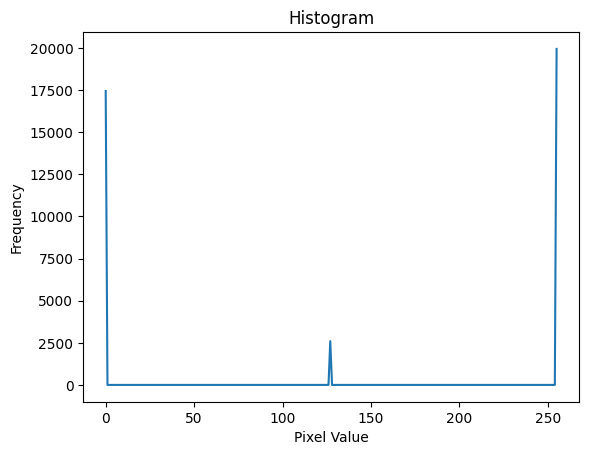

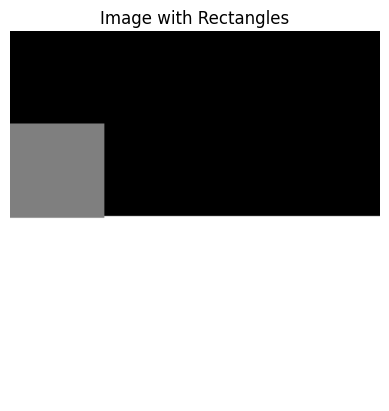

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Create a black image and draw rectangles
img = np.zeros((200, 200), np.uint8)
cv2.rectangle(img, (0, 100), (200, 200), (255), -1)
cv2.rectangle(img, (0, 50), (50, 100), (127), -1)

# Calculate histogram
#It accept parameters like ([img],[channel],mask,[histsize],range[0-255]).
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# Display image using matplotlib (as cv2.imshow() is not supported in Colab)
plt.imshow(img, cmap='gray')
plt.title("Image with Rectangles")
plt.axis('off')  # Turn off axis
plt.show()

#**plot histomgram using matplotlib With the help of colors**

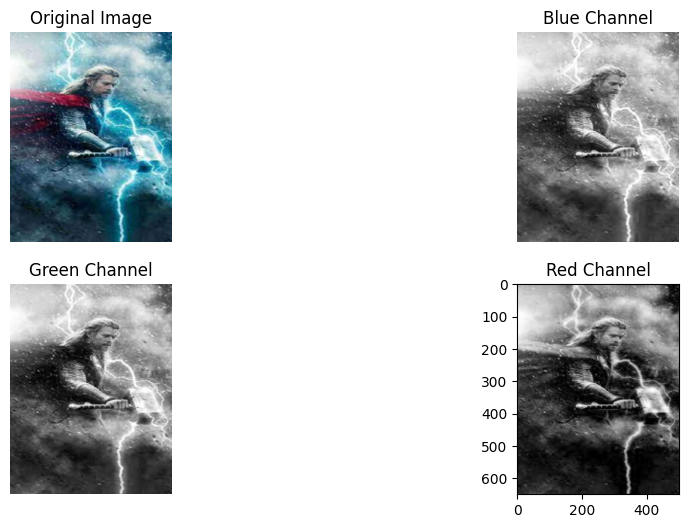

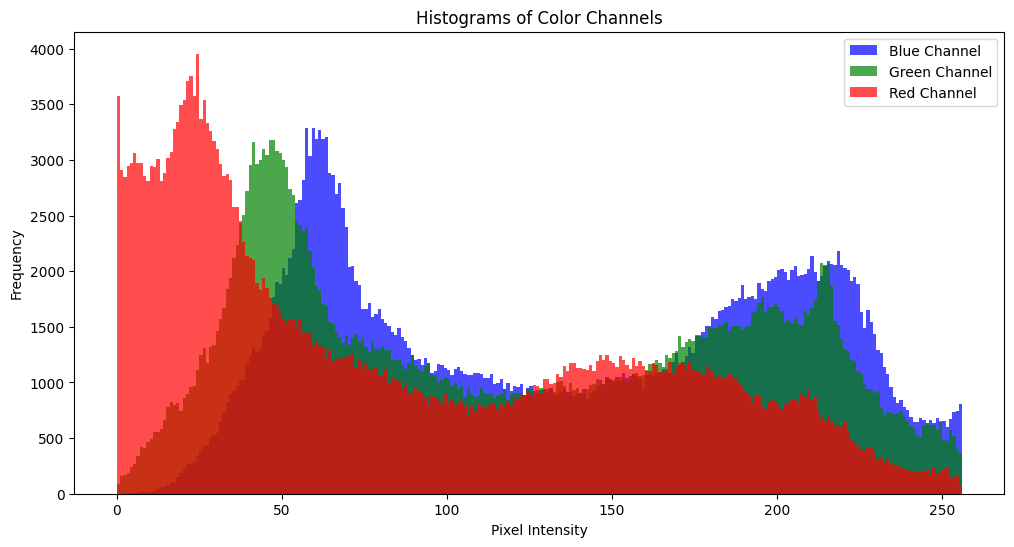

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (make sure the path is correct)
img = cv2.imread("/content/thor4.jpeg")  # Update the path to your image file
img = cv2.resize(img, (500, 650))  # Resize the image

# Split the image into Blue, Green, and Red channels
b, g, r = cv2.split(img)

# Convert the BGR image to RGB for correct color display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
b_rgb = cv2.cvtColor(cv2.merge([b, b, b]), cv2.COLOR_BGR2RGB)
g_rgb = cv2.cvtColor(cv2.merge([g, g, g]), cv2.COLOR_BGR2RGB)
r_rgb = cv2.cvtColor(cv2.merge([r, r, r]), cv2.COLOR_BGR2RGB)

# Plot the original image and the separate channels
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Display blue channel
plt.subplot(2, 2, 2)
plt.imshow(b_rgb)
plt.title("Blue Channel")
plt.axis("off")

# Display green channel
plt.subplot(2, 2, 3)
plt.imshow(g_rgb)
plt.title("Green Channel")
plt.axis("off")

# Display red channel
plt.subplot(2, 2, 4)
plt.imshow(r_rgb)
plt.title("Red Channel")
plt.axis("on")

# Show all the images
plt.show()

# Plot histograms for each color channel
plt.figure(figsize=(12, 6))
plt.hist(b.ravel(), 256, [0, 256], color='blue', alpha=0.7, label='Blue Channel')
plt.hist(g.ravel(), 256, [0, 256], color='green', alpha=0.7, label='Green Channel')
plt.hist(r.ravel(), 256, [0, 256], color='red', alpha=0.7, label='Red Channel')
plt.title("Histograms of Color Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# **Gray scale histogram**

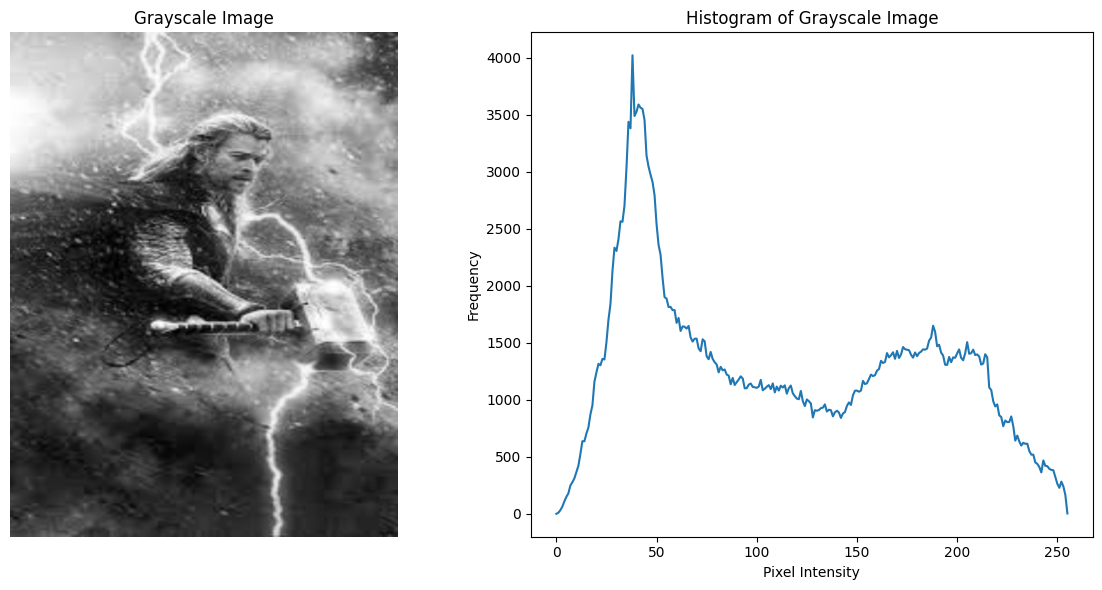

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (update the path if necessary)
img = cv2.imread("/content/thor4.jpeg")  # Make sure to update the path to your image
img = cv2.resize(img, (500, 650))  # Resize the image

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the grayscale image
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Plot the grayscale image
plt.figure(figsize=(12, 6))

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")  # Hide axis

# Plot the histogram
plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Show both the image and histogram
plt.tight_layout()
plt.show()


# **Histogram equalization**

**Histogram equalization is good when  of the image is confined to a particular region.**

**It accept gray scale image**

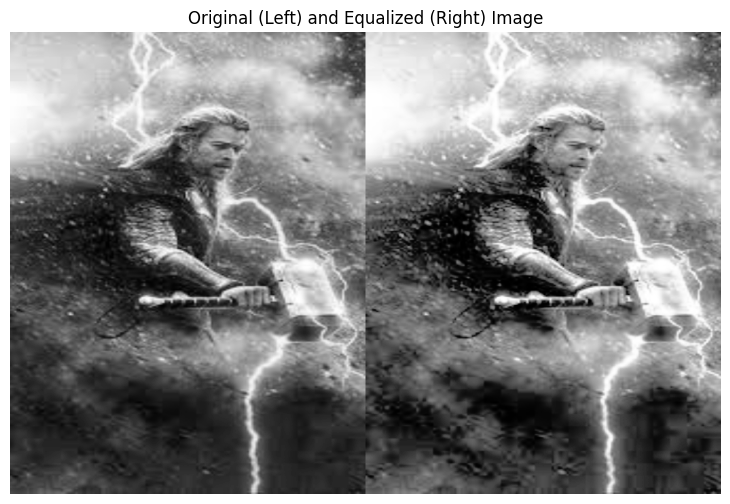

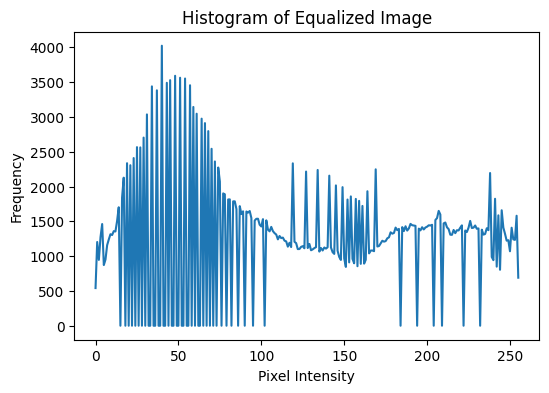

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the path is correct)
img = cv2.imread("/content/thor4.jpeg")  # Update with your image path
img = cv2.resize(img, (500, 650))  # Resize for better visibility

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equ = cv2.equalizeHist(img_gray)

# Stack the original grayscale image and the equalized image side by side
res = np.hstack((img_gray, equ))   #hstack is used to merge img_ray and equalized image
# Display the stacked result
plt.figure(figsize=(10, 6))
plt.imshow(res, cmap='gray')
plt.title("Original (Left) and Equalized (Right) Image")
plt.axis('off')
plt.show()

# Calculate and plot the histogram of the equalized image
hist1 = cv2.calcHist([equ], [0], None, [256], [0, 256])

# Plot the histogram of the equalized image
plt.figure(figsize=(6, 4))
plt.plot(hist1)
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


# **CLAHE (Contrast Limited Adaptive Histogram Equalization)**

create a CLAHE object (Arguments are optional).

It is used to enchance image and also handle noise from image region

gray scale imge is required

# **CLAHE:**

**The CLAHE (Contrast Limited Adaptive Histogram Equalization) is applied to the grayscale image (img_gray) using clahe.apply().**
    
**The clipLimit controls the contrast enhancement, and the tileGridSize defines the size of the grid of tiles that are used to calculate the histogram locally.**

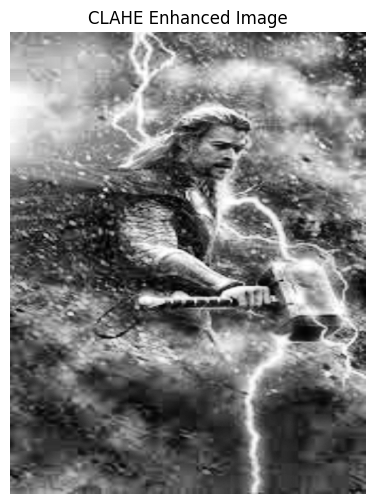

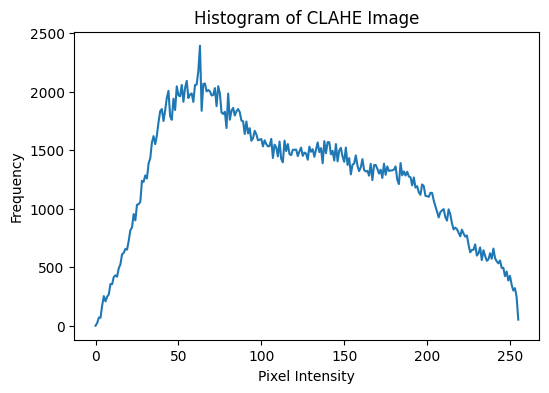

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the path is correct)
img = cv2.imread("/content/thor4.jpeg")  # Update with your image path
img = cv2.resize(img, (500, 650))  # Resize for better visibility

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
cl1 = clahe.apply(img_gray)

# Display the CLAHE-enhanced image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cl1, cmap='gray')
plt.title("CLAHE Enhanced Image")
plt.axis('off')  # Hide axis for cleaner display
plt.show()

# Calculate and plot the histogram of the CLAHE-enhanced image
hist2 = cv2.calcHist([cl1], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.plot(hist2)
plt.title("Histogram of CLAHE Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
